# Fit a Michaëlis-Menten kinetic

Let's fit a model coming from the physical chemistry field with real data.

## Select model

We select a homegeneous catalysis solver:

In [1]:
import numpy as np
from scifit.solvers.scientific import MichaelisMentenKineticFitSolver

Now create a new solver instance:

In [2]:
solver = MichaelisMentenKineticFitSolver()

## Load data

We create some syntehtic dataset:

In [3]:
data = solver.synthetic_dataset(
    xmin=0.0, xmax=2000.0, dimension=1, resolution=50,
    parameters=[3.71e-2, 1.49e2],
    sigma=0.025, scale_mode="auto", seed=1234,
)

In [4]:
df = solver.load(data, store=True)

In [5]:
df.sample(5)

,x0,y,sy,yref,ynoise
id,,,,,
48,1918.367347,0.034434,0.000432,0.034426,0.000008
6,204.081633,0.021827,0.000432,0.021444,0.000383
49,1959.183673,0.034804,0.000432,0.034478,0.000326
3,81.632653,0.013750,0.000432,0.013132,0.000618
39,1551.020408,0.034212,0.000432,0.033848,0.000363


## Solve Fit

Everything is setup, we can solve our problem:

In [6]:
solution = solver.fit(p0=[1e-2, 1e2])

In [7]:
solver.solved()

True

In [8]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [9]:
print(solution["parameters"])

[3.71723029e-02 1.49870982e+02]


In [10]:
print(np.diag(solution["covariance"]))

[1.88136783e-08 1.03155703e+01]


As we can see, parameters have been properly regressed.

## Render solution

Finally we can render fit and loss function to check the dynamic:

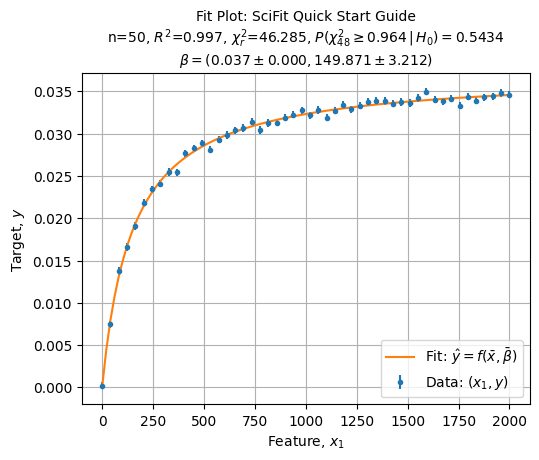

In [11]:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

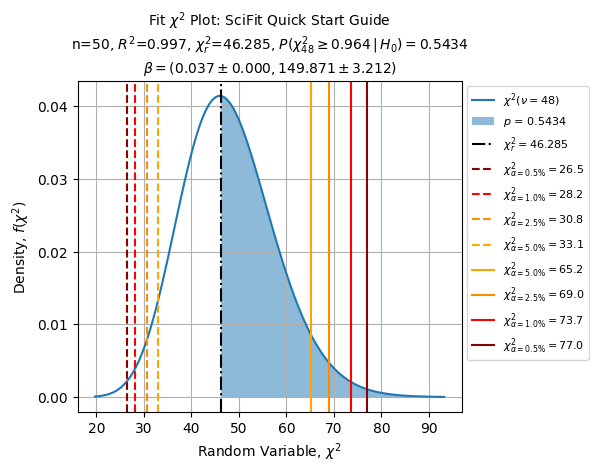

In [12]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

In [13]:
solver.parameter_domains()

,0,1
min,0.018586,74.935491
max,0.055758,224.806473


In [14]:
solver.parameter_domains()

,0,1
min,0.018586,74.935491
max,0.055758,224.806473


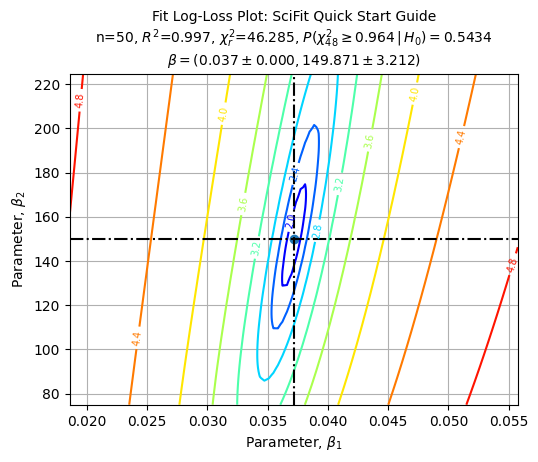

In [15]:
axe = solver.plot_loss(
    title="SciFit Quick Start Guide", resolution=100,
    log_loss=True
)

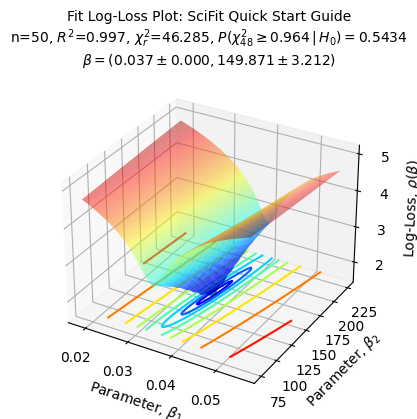

In [16]:
axe = solver.plot_loss_low_dimension(
    title="SciFit Quick Start Guide", resolution=100,
    surface=True, log_loss=True
)